# Декомпозиция на основе тренда и сезонности

Выделяют три модели представления временного ряда. 
Аддитивная

(Yt)=Tt+St+et

Мультипликативная

(Yt)=Tt×St×et

Смешанная

(Yt)=(Tt+et)×St

где
- (Yt ) ̂- прогнозное значение;
- T – основной сигнал ряда;
- S – коэффициент сезонности;
- e – остатки (ошибка).

Понятие коэффициента сезонности:
- Сезонность - периодические колебания, наблюдаемые на временных рядах.
- Коэффициент сезонности показывает, насколько продажи в данном периоде отклонились от среднего значения.

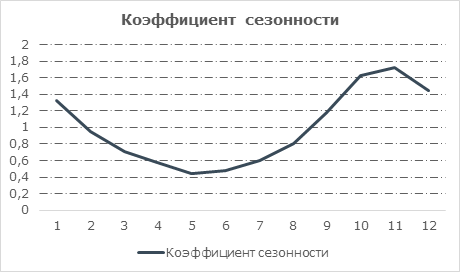

Выполним разложение ряда по мультипликативной модели и изучим результаты.

Обратите внимание на параметр freq. Мы передаем его в модель, чтобы помочь с пониманием количества периодов в одном сезоне. В случае данных с разбивкой по кварталам, freq будет равен 4.

Чтобы получить значения тренда, надо выполнить команду:

In [ ]:
# декомпозиция 
result_M = seasonal_decompose(df.Y, model='multiplicative', freq=12)

# Построение графика
plt.rcParams.update({'figure.figsize': (10,10)})
result_M.plot().suptitle('Мультипликативная модель')

In [ ]:
result_M.seasonal['2011']

In [ ]:
result_M.trend['2011']

Выполним аддитивное разложение ряда, чтобы посмотреть, какой вариант лучше подходит в нашем случае.

In [ ]:
# Decompose 
result_A = seasonal_decompose(df.Y, model='additive', freq=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_A.plot().suptitle('Адитивная модель')

In [ ]:
result_A.seasonal['2011']

In [ ]:
result_A.trend['2011']

Значения тренда и сезонности мы можем получить аналогичным вышеописанным методом. Единственное, что название модели сменится с result_M на result_A.

# Корректировка ряда

Итог оценки наличия аномалий в году:
- Релевантными для прогноза являются только данные начиная с 2014 года.
- Первое полугодие 2018 года нуждается в корректировке. 

Чтобы скорректировать, достаточно выполнить команду:


In [ ]:
df.loc['2018-01-01']=df.loc['2017-01-01']

Аналогично повторить для других месяцев 2018 года начиная с февраля и по июнь.

Построим повторно совмещенный график по месяцам, но уже начиная только с 2014 года.

In [ ]:
df.loc['2018-02-01']=df.loc['2017-02-01']
df.loc['2018-03-01']=df.loc['2017-03-01']
df.loc['2018-04-01']=df.loc['2017-04-01']
df.loc['2018-05-01']=df.loc['2017-05-01']
df.loc['2018-06-01']=df.loc['2017-06-01']

In [ ]:
sesonal(df['2014':],12)

В итоге мы получим очищенные данные, пригодные для построения прогноза.

In [ ]:
plot(df, ts_linewidth=3)

# Тренировочные и тестовые наборы

Чтобы иметь возможность более качественно оценивать модель, разделим данные на тренировочные и тестовые. Часть данных мы «спрячем» от модели и будем пробовать их предсказать.

In [ ]:
train=df['2014':'2018']
train.head()

Тестовые данные возьмем за 7 месяцев 2019 года. 

In [ ]:
test=df['2019']
test.head()

# Модель Хольта-Винтерса

Модель Хольта-Винтерса использует идеи модели экспоненциального сглаживания, но является более сложной и может применяться к рядам, содержащим тенденцию и сезонность. 

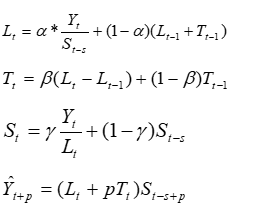

где

Lt – новая сглаженная величина;

α – постоянная сглаживания для данных (0 ≤ α ≥ 1);

Yt – новое наблюдение или реальное значение ряда в период t;

β - постоянная сглаживания для оценки тренда (0 ≤ β ≤1);

Тt - собственно оценка тренда;

(гамма) - постоянная сглаживания для оценки сезонности;

St – оценка сезонности; 

s – длительность периода сезонного колебания;

р – количество периодов вперед, на которое делается прогноз;

Ŷ t+p - прогноз на р периодов вперед.

К счастью, модель реализована в одной из библиотек Python и мы не будем воспроизводить все формулы.

In [ ]:
fit1 = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='mul').fit()

In [ ]:
fit1.params

Первая команда «тренирует» модель fit1. В данном случае реализована классическая модель с аддитивным трендом и мультипликативной сезонной компонентой. Но мы можем построить модель вида в части сочетаний аддитивной и мультипликативной моделей. 

Обратите внимание на параметр seasonal_periods – мы подсказываем модели количество сезонов. Этот параметр необходимо изменить при прогнозировании по кварталам.

Из параметров модели нам интересны:
- 'smoothing_level', 'smoothing_slope', 'smoothing_seasonal' – это постоянные сглаживания для основного ряда данных, тренда и сезонности; 
- 'initial_level' – начальный уровень основного ряда данных; 
- 'initial_slope' – начальный уровень тренда; 
- 'initial_seasons' – начальные значения коэффициентов сезонности.

Мы можем получить расчетные значения для модели и рассчитать метрики точности.

In [ ]:
fit1.fittedvalues

Рассчитаем прогноз на 12 месяцев вперед.

In [ ]:
fit1.forecast(12)

In [ ]:
ax = df.plot(figsize=(15,6), color='black', title="Прогноз методом Хольта Винтерса" )
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit1.forecast(12).plot(ax=ax, style='--', color='green')
plt.show()

Некоторые комментарии к коду:
- figsize=(15,6) размер картинки по горизонтали и вертикали.
- Color – цвет линии.
- title – название графика.
- style=’—' – заполнение линии, можно изменять. 

#  Оценка качества и точности математических моделей с использованием стандартных метрик (ошибок)

## Среднее абсолютное отклонение

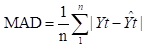

## Среднеквадратическая ошибка 

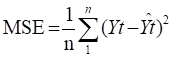

Наиболее важная. Именно на нее обращают внимание в первую очередь, когда сравнивают точность методов между собой. Уменьшение этой ошибки приводит к уменьшению всех остальных ошибок.

## Средняя абсолютная ошибка в процентах

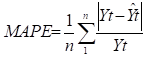

## Средняя процентная ошибка

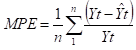